# Assignment 3

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('Dataset/Iris.csv')

## Correlation

In [35]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [37]:
def compute_correlation_matrix(df):
   
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    data = numerical_df.to_numpy()
    means = np.mean(data, axis=0)
    centered_data = data - means
    cov_matrix = np.cov(centered_data, rowvar=False, bias=False)
    std_devs = np.sqrt(np.diag(cov_matrix))
    corr_matrix = cov_matrix / np.outer(std_devs, std_devs)
    corr_df = pd.DataFrame(corr_matrix, index=numerical_df.columns, columns=numerical_df.columns)
    return corr_df
correlation_matrix = compute_correlation_matrix(df)
print(correlation_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


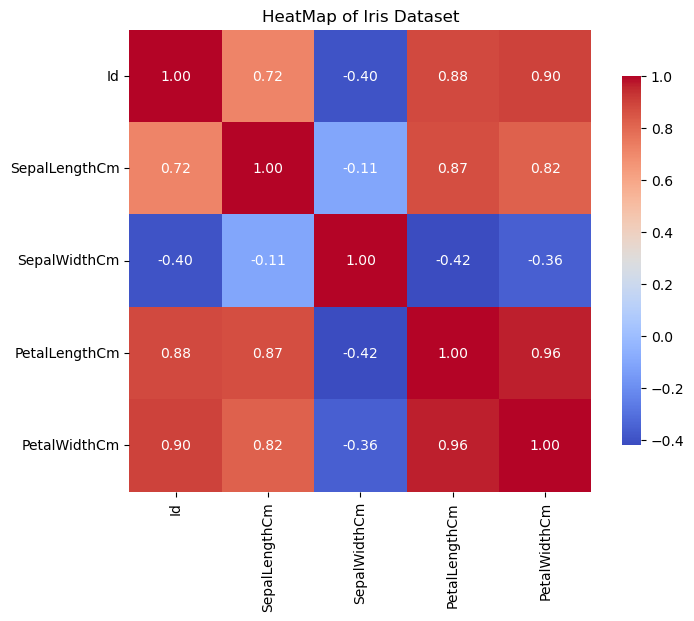

In [56]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('HeatMap of Iris Dataset')
plt.show()

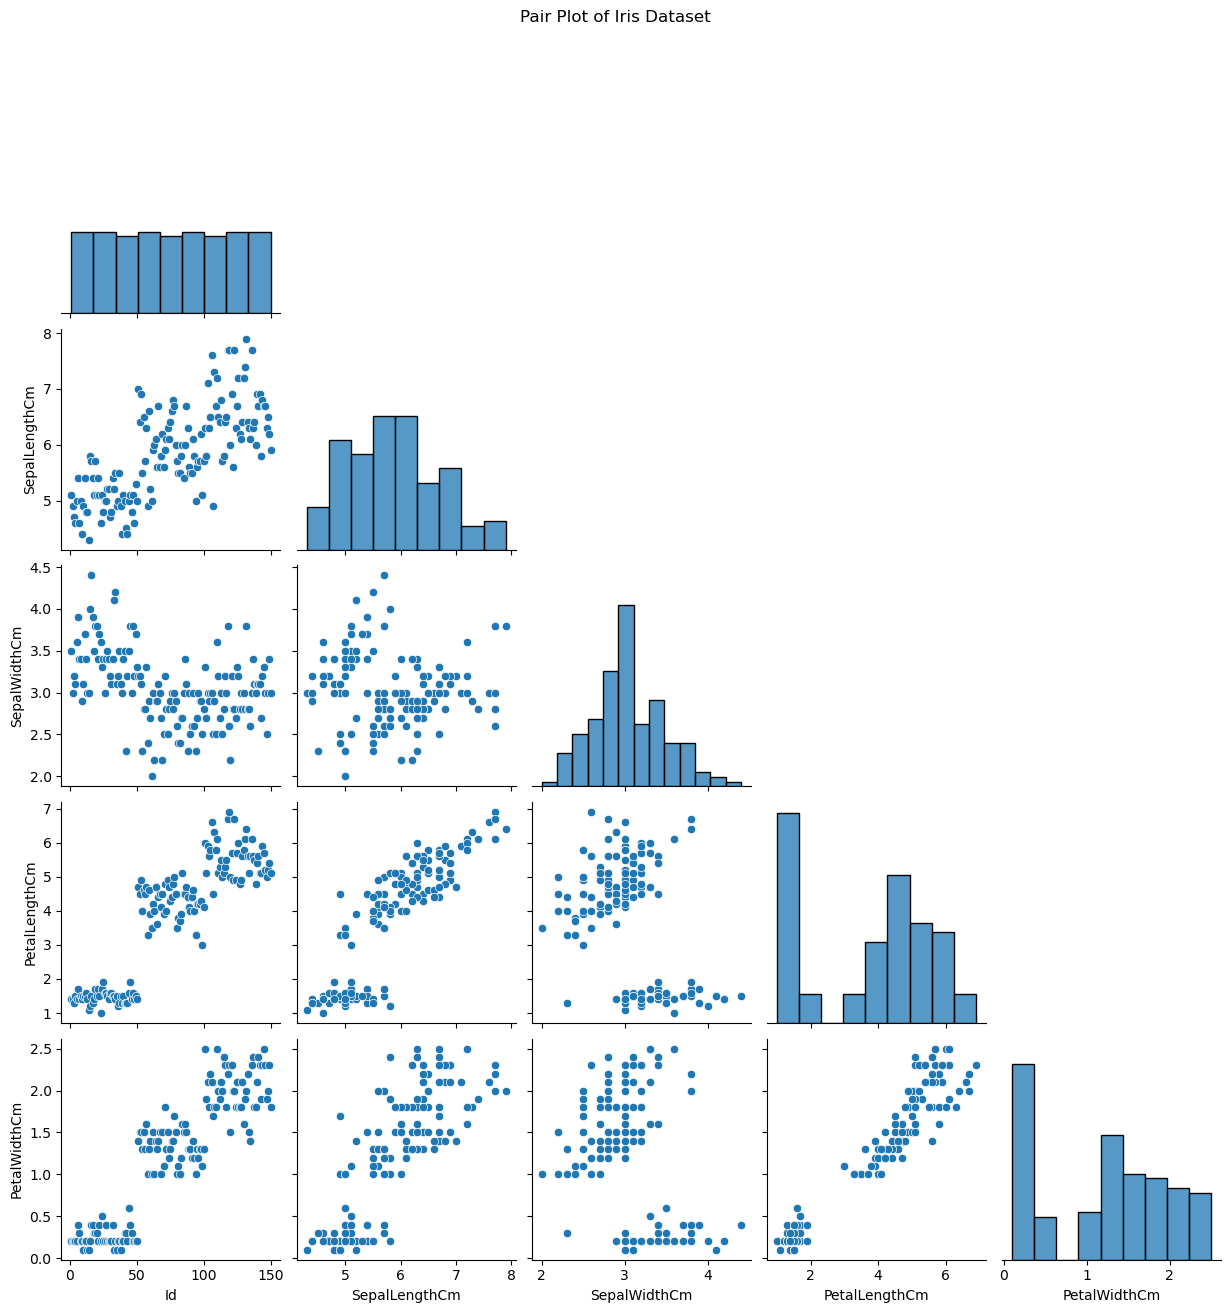

In [41]:
# Pair Plot
sns.pairplot(df, corner=True)
plt.suptitle('Pair Plot of Iris Dataset', y=1.05)
plt.show()

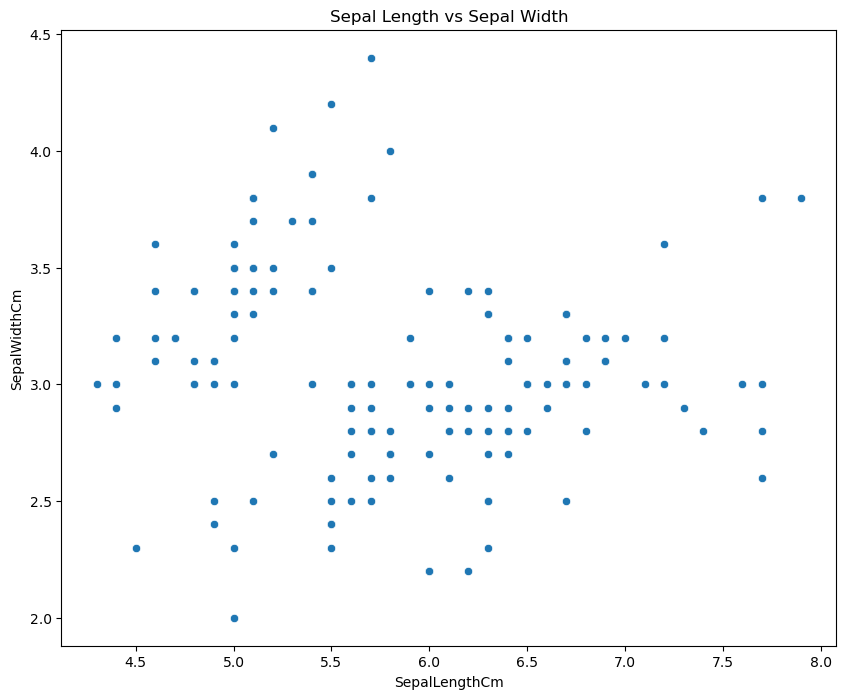

In [42]:
# Scatter Plot Matrix
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.show()

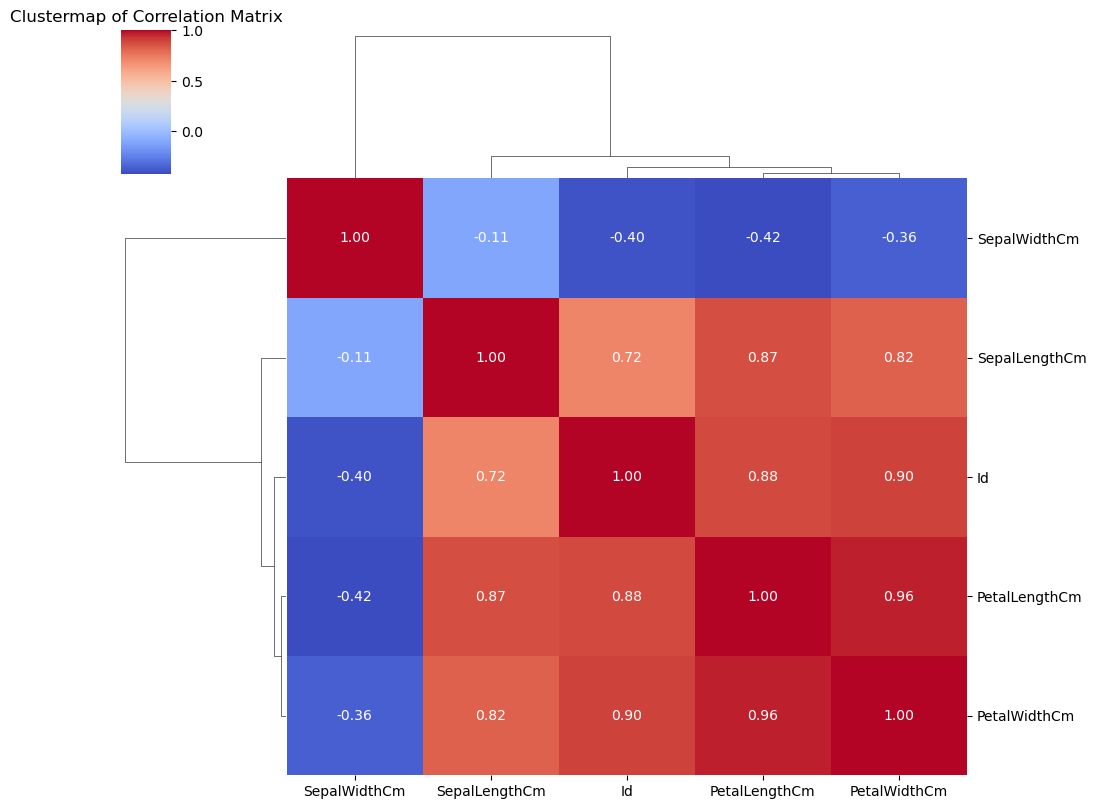

In [43]:
# Correlation Matrix with Clustermap
sns.clustermap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', figsize=(10, 8))
plt.title('Clustermap of Correlation Matrix')
plt.show()

## Covariance

In [72]:
cov_matrix = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].cov()

In [74]:
print(cov_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       0.685694     -0.039268       1.273682      0.516904
SepalWidthCm       -0.039268      0.188004      -0.321713     -0.117981
PetalLengthCm       1.273682     -0.321713       3.113179      1.296387
PetalWidthCm        0.516904     -0.117981       1.296387      0.582414
